<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Mapa de características con redes neuronales convolucionales (CNN)

Ejemplo de como generar el un mapa de características (feature map) utilizando redes neuronales convolucionales<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential

from glob import glob
import matplotlib.image as mpimg

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `Simpsons dataset`:
El dataset **`Simpsons`** contiene 550Mbytes de imagenes a color de los personajes de los Simpsons (47 personajes). Cada imagen es de tiene al rededor de 500x450 píxeles a color (3 canales).<br> [Dataset source](https://www.kaggle.com/paultimothymooney/zipfiles)

In [6]:
# Descargar datos de test
if os.access('simpsons_test', os.F_OK) is False:
    if os.access('simpsons_test.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip > simpsons_test.zip
        else:
            !wget simpsons_test.zip https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
    !unzip -q simpsons_test.zip
else:
    print("El archivo ya se encuentra descargado")

El archivo ya se encuentra descargado


In [9]:
# Levantar el modelo ya entrenado
from keras.models import load_model
model2 = load_model('cnn_simpsons.h5') 

In [8]:
# Leer los datos de test
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory="./simpsons_test",
        target_size=(150, 150),
        batch_size=10,
        class_mode=None,
        shuffle=False)

Found 10 images belonging to 1 classes.


In [11]:
batch_test = test_generator.next()

En amarrillo se ve a lo que el filtro reacciona


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


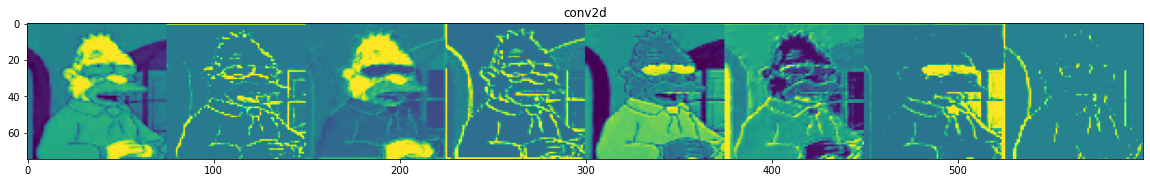

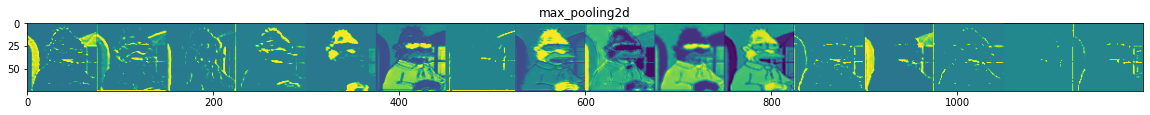

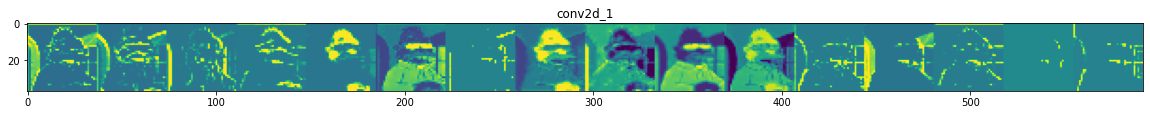

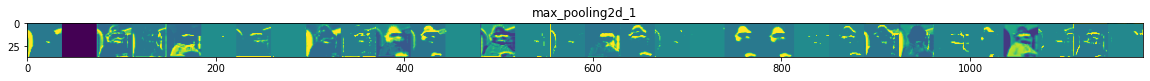

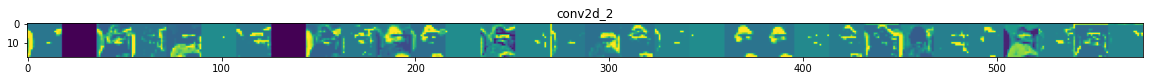

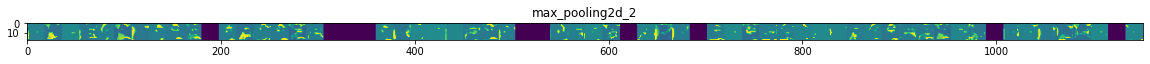

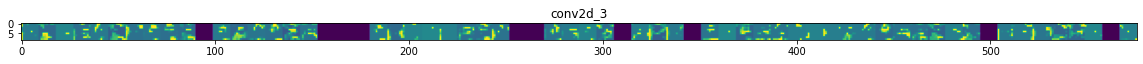

In [18]:
# Dibujar el mapa de caracteristicas
# Leer datos del modelo
successive_outputs = [layer.output for layer in model2.layers[1:]]
visualization_model = keras.models.Model(inputs = model2.input, outputs = successive_outputs)

# Cargar una imagen, elegir número de 0 a 9
x = np.array([batch_test[0]])

# Obtener el rsultado de pasar la imagen por cada capa
successive_feature_maps = visualization_model.predict(x)

# Obtener los nombres de las capas
layer_names = [layer.name for layer in model2.layers]

# Formar el mapa de caracteristicas
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:
    
    # Dibujar el feature map solo para CONV y POOL
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    # Transformar el resultado para poder visualizarlo mejor
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x 

    # Dibujar
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

print("En amarrillo se ve a lo que el filtro reacciona")
plt.show()